In [3]:
import pandas as pd

# Task

타이타닉 탑승자 중 생존자(Survived)를 예측하자

# 데이터 수집

In [4]:
#
titanic = pd.read_csv('../Datasets/titanic_train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# 전처리#1 - logic이 정해진 전처리

전처리는 크게 두 가지
1. logic이 짜여진 전처리
    ex) male -> 0 으로 바꾸시오
2. train기반으로 전처리
    ex) minmax정규화 시에 train을 기반으로 test에 적용하시오(중급)

> 문제를 읽고 판단하면 됨

1의 경우는 전처리 다 하고 나서 train test분할해도 됨

## 제거

q. 'PassengerId', 'Name', 'Ticket' 컬럼을 제거후 반영하라 3m

In [5]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket'])

## NA 처리

q. na인 컬럼을 구하시오 3m (sum쓰지말고)

In [6]:
titanic.isna().any(axis=0)

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [7]:
titanic.isna().any(axis=1)

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

q. na인 컬럼의 na가 몇 개나 되는지 구하시오 3m

In [8]:
titanic.isna().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

q. Cabin컬럼의 결측치는 'N'으로 대체하여라 3m

In [9]:
titanic['Cabin']= titanic.Cabin.fillna('N')

q. Age 결측치를 Age의 평균으로 대체하라 3m

In [10]:
titanic[titanic.Age.isna()]

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Cabin Embarked
5           0       3    male  NaN      0      0   8.4583     N        Q
17          1       2    male  NaN      0      0  13.0000     N        S
19          1       3  female  NaN      0      0   7.2250     N        C
26          0       3    male  NaN      0      0   7.2250     N        C
28          1       3  female  NaN      0      0   7.8792     N        Q
..        ...     ...     ...  ...    ...    ...      ...   ...      ...
859         0       3    male  NaN      0      0   7.2292     N        C
863         0       3  female  NaN      8      2  69.5500     N        S
868         0       3    male  NaN      0      0   9.5000     N        S
878         0       3    male  NaN      0      0   7.8958     N        S
888         0       3  female  NaN      1      2  23.4500     N        S

[177 rows x 9 columns]

In [11]:
titanic['Age']=titanic.Age.fillna(titanic.Age.mean())

In [12]:
titanic.Age.isna().sum()

0

q. 결측치가 있는 행은 제거한 후 반영하여라 1m

In [13]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [14]:
titanic=titanic.dropna()

In [15]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 필터링

q. Embarked가 'Q'인 행을 제외 후 반영하여라 3m

In [16]:
titanic = titanic[titanic.Embarked!='Q']
# titanic[~(titanic.Embarked=='Q')]

q. Cabin에서 비율이 가장 높은 값을 가진 데이터 그룹의 Age 평균은? 5m

In [17]:
titanic.Cabin.value_counts()

Cabin
N              614
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 145, dtype: int64

In [18]:
cabin_max=titanic.Cabin.value_counts().idxmax()
cabin_max

'N'

In [19]:
titanic.Cabin.value_counts().nlargest(1).index[0]

'N'

In [20]:
titanic.Cabin.value_counts().nlargest(2)

Cabin
N              614
C23 C25 C27      4
Name: count, dtype: int64

In [21]:
titanic.loc[titanic.Cabin==cabin_max, 'Age'].mean()

27.954156447595324

# 대체

q. Cabin의 앞글자만 채택한 데이터로 기존Cabin을 대체하여라 3m

In [22]:
# 5-dataprocessing-1-pandas-0-series.ipynb

In [23]:
titanic.Cabin

0         N
1       C85
2         N
3      C123
4         N
       ... 
884       N
886       N
887     B42
888       N
889    C148
Name: Cabin, Length: 812, dtype: object

In [24]:
titanic.Cabin.str[:1]
# titanic.Cabin.str.slice(0,1)

0      N
1      C
2      N
3      C
4      N
      ..
884    N
886    N
887    B
888    N
889    C
Name: Cabin, Length: 812, dtype: object

In [25]:
titanic['Cabin'] = titanic.Cabin.str[:1]

q. Sex컬럼의 male은 0 female은 1로 변경 후 반영하시오 1m (replace함수 제외)

In [26]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
884      male
886      male
887    female
888    female
889      male
Name: Sex, Length: 812, dtype: object

In [27]:
titanic['Sex'].map(lambda x: 0 if x=='male' else 1)

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
888    1
889    0
Name: Sex, Length: 812, dtype: int64

In [28]:
titanic['Sex'] = titanic['Sex'].map(lambda x: 0 if x=='male' else 1)

q. Embarked컬럼의 S은 0  C는 1로 변경 후 반영하시오 5m (map제외)

In [29]:
titanic.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
884    S
886    S
887    S
888    S
889    C
Name: Embarked, Length: 812, dtype: object

In [30]:
titanic['Embarked']=titanic.Embarked.replace({'S':0,'C':1})

q. Cabin컬럼은 영문순서에 맞춰 수치형으로 변경 후 반영하시오.10m   
ex)'A':0,  'B': 1, 'T':8  
hint: zip sorted range replace 

In [31]:
titanic.Cabin.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
sorted(titanic.Cabin.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']

In [33]:
len(titanic.Cabin.unique())

9

In [34]:
Cabin_dict = {}

In [35]:
for Cabin,num in zip(sorted(titanic.Cabin.unique()), range(9)):
    Cabin_dict[Cabin]=num

In [36]:
Cabin_dict

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7, 'T': 8}

In [37]:
titanic['Cabin']=titanic.Cabin.replace(Cabin_dict)
titanic['Cabin']

0      7
1      2
2      7
3      2
4      7
      ..
884    7
886    7
887    1
888    7
889    2
Name: Cabin, Length: 812, dtype: int64

# 데이터 분할

q. train test를 7:3의 비율로 분할하여라(random_state는 42)

In [38]:
#
from sklearn.model_selection import train_test_split

In [39]:
X_col = titanic.columns

In [40]:
X_col=X_col.drop('Survived')

In [41]:
X_col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [42]:
X = titanic[X_col]

In [43]:
y = titanic['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

> test는 우리가 보지 못한 unseen 데이터라고 생각해야 함

In [45]:
X_train.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
482       3    0  50.0      0      0   8.0500      7         0
146       3    0  27.0      0      0   7.7958      7         0
558       1    1  39.0      1      1  79.6500      4         0
296       3    0  23.5      0      0   7.2292      7         1
685       2    0  25.0      1      2  41.5792      7         1

# 모델 생성

q. decision tree 모델을 돌리시오 seed는 124, 분류기준은 Gini, Max Depth=7
아래 코드를 이용   
from sklearn.tree import DecisionTreeClassifier 

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_dt=DecisionTreeClassifier(random_state=124, criterion='gini', max_depth=7)

In [48]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=124)

# 예측

In [49]:
y_pred=model_dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

# 모델 평가

q. accuray를 구하시오

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.776     0.898     0.833       147
           1      0.797     0.608     0.690        97

    accuracy                          0.783       244
   macro avg      0.787     0.753     0.761       244
weighted avg      0.785     0.783     0.776       244



q. accuray를 소수점 넷째 자리에서 반올림하여 셋째자리까지 구하시오

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, y_pred).round(3)

0.783

--- 

q.Root Node 의 split feature 와 split value를 기술하시오. ex) Age, 22  
아래 코드를 이용하시오  
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [54]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.46875\nsamples = 568\nvalue = [355, 213]'),
 Text(0.25, 0.625, 'Cabin <= 6.0\ngini = 0.32254\nsamples = 376\nvalue = [300, 76]'),
 Text(0.125, 0.375, 'Age <= 17.5\ngini = 0.49959\nsamples = 70\nvalue = [36, 34]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 9.5\ngini = 0.23683\nsamples = 306\nvalue = [264, 42]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.4088\nsamples = 192\nvalue = [55, 137]'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.14427\nsamples = 115\nvalue = [9, 106]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Fare <= 23.9125\ngini = 0.48103\nsamples = 77\nvalue = [46, 31]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

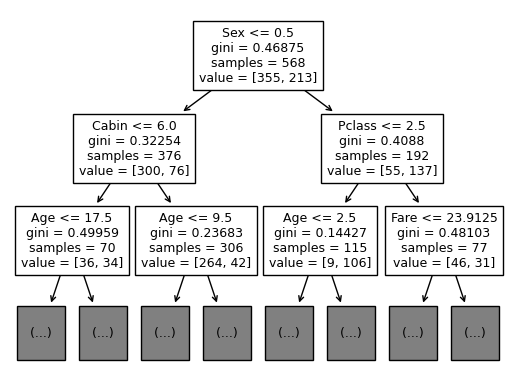

In [55]:
plot_tree(model_dt, max_depth=2, fontsize=9, feature_names=list(X_col), precision=5)

In [56]:
print(export_text(model_dt, feature_names=X_col, decimals=3))

|--- Sex <= 0.500
|   |--- Cabin <= 6.000
|   |   |--- Age <= 17.500
|   |   |   |--- class: 1
|   |   |--- Age >  17.500
|   |   |   |--- Fare <= 99.990
|   |   |   |   |--- Age <= 51.500
|   |   |   |   |   |--- Fare <= 26.144
|   |   |   |   |   |   |--- Pclass <= 2.500
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Pclass >  2.500
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  26.144
|   |   |   |   |   |   |--- Fare <= 42.750
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  42.750
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  51.500
|   |   |   |   |   |--- Age <= 75.000
|   |   |   |   |   |   |--- Fare <= 78.244
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  78.244
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  75.000
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Fare >  99.990
|   |   |   |   |--- class: 0


a. sex, 0.5

---

# 로지스틱 리그레션

- 분류 모델

q. 로지스틱 리그레션을 사용하여 여성을 기준으로 recall을 구하시오   
아래 코드를 이용하시오  
from sklearn.linear_model import LogisticRegression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model_lg = LogisticRegression()

In [60]:
model_lg.fit(X_train,y_train)

C:\Users\beluga\miniconda3\envs\exam\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- 예측

In [61]:
y_pred = model_lg.predict(X_test)

In [62]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1], dtype=int64)

- 평가

In [63]:
from sklearn.metrics import recall_score

In [64]:
recall_score(y_test, y_pred, pos_label=1)

0.7319587628865979

> 생존을 기준으로 recall 구해야하니깐 positive는 생존을 뜻하는 1이 되어야함

In [65]:
recall_score(y_test, y_pred,)

0.7319587628865979

# q5-3번

In [66]:
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [67]:
#
df =  pd.read_csv('../Datasets/Dataset_05.csv')
df.head()

ID  Age  Age_gr  Gender  Work_Experience  Family_Size  Ever_Married  \
0  462809   22      30       1              1.0          4.0             1   
1  462643   38      40       0              NaN          3.0             2   
2  466315   67      70       0              1.0          1.0             2   
3  461735   67      70       1              0.0          2.0             2   
4  462669   40      40       0              NaN          6.0             2   

   Graduated  Profession  Spending_Score  Var_1 Segmentation  
0          1           6               2      4          NaN  
1          2           3               0      4            A  
2          2           3               2      6          NaN  
3          2           8               1      6            B  
4          2           4               1      6            A

Segmentation 값이A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류 정확도를
측정해 본다. 
- Train대Test 7대3으로 데이터를 분리한다. (Seed = 123)
- Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를 수행한다.
- 의사결정나무 학습 시, 다음과 같이 설정하시오:
    - Feature: Age_gr, Gender, Work_Experience, Family_Size, Ever_Married, Graduated, Spending_Score
    - Label : Segmentation
    - Parameter : Gini / Max Depth = 7 / Seed = 123  

이 때 전체 정확도(Accuracy)를소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지 기술하시오.
(답안 예시) 0.12


- Segmentation 값이A 또는 D인 데이터만 사용

In [68]:
df[df.Segmentation.isin(['A','D'])]

ID  Age  Age_gr  Gender  Work_Experience  Family_Size  Ever_Married  \
1     462643   38      40       0              NaN          3.0             2   
4     462669   40      40       0              NaN          6.0             2   
7     464347   33      40       0              1.0          3.0             1   
8     465015   61      70       0              0.0          3.0             2   
10    464041   26      30       0              1.0          3.0             1   
...      ...  ...     ...     ...              ...          ...           ...   
8059  460132   39      40       1              3.0          2.0             1   
8060  463613   48      50       0              0.0          6.0             2   
8063  464018   22      30       1              0.0          7.0             1   
8064  464685   35      40       1              3.0          4.0             1   
8065  465406   33      40       0              1.0          1.0             1   

      Graduated  Profession  Spending_Score  Var_1 Segmentation  
1             2           3               0      4            A  
4             2           4               1      6            A  
7             2           6               2      6            D  
8             2           3               2      7            D  
10            2           3               2      6            A  
...         ...         ...             ...    ...          ...  
8059          2           6               2      6            D  
8060          2           1               0      6            A  
8063          1           0               2      1            D  
8064          1           5               2      4            D  
8065          2           6               2      6            D  

[4239 rows x 12 columns]

In [69]:
df=df[df.Segmentation.isin(['A','D'])]
# df[(df.Segmentation== 'A' )|(df.Segmentation== 'D')]

의사결정나무 학습 시, 다음과 같이 설정하시오:
- Feature: Age_gr, Gender, Work_Experience, Family_Size, Ever_Married, Graduated, Spending_Score  
- Label : Segmentation  

In [70]:
df.columns

Index(['ID', 'Age', 'Age_gr', 'Gender', 'Work_Experience', 'Family_Size',
       'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1',
       'Segmentation'],
      dtype='object')

In [71]:
col_X = ['Age_gr', 'Gender', 'Work_Experience', 'Family_Size', 'Ever_Married', 'Graduated', 'Spending_Score']

In [72]:
X=df[col_X]

In [73]:
y=df.Segmentation

- Train대Test 7대3으로 데이터를 분리한다. (Seed = 123)

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

- Parameter : Gini / Max Depth = 7 / Seed = 123

In [75]:
model_dt=DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=123)

In [76]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

In [77]:
y_pred=model_dt.predict(X_test)

이 때 전체 정확도(Accuracy)를소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지 기술하시오. (답안 예시) 0.12

In [78]:
metrics.accuracy_score(y_test, y_pred).round(2)

0.69

### A. 0.69

# q 3-3번

In [79]:
#
df=pd.read_csv('../Datasets/Dataset_03.csv')
df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [80]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
random_state = 123 #train_test_split

In [81]:
col_X = df.columns[:-1]

In [82]:
X = df[col_X]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, df.gender, test_size=0.3, random_state=random_state)

In [84]:
model_LR=LogisticRegression()

In [85]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred=model_LR.predict(X_test)

In [87]:
metrics.precision_score(y_test,y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['Female', 'Male']

In [88]:
y_pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [89]:
metrics.precision_score(y_test,y_pred, pos_label='Male')

0.9596354166666666

In [90]:
metrics.precision_score(y_test,y_pred, pos_label='Male').round(2)

0.96

### A. 0.96